<a href="https://colab.research.google.com/github/SushmaRajagopal/Freshness-Grading-of-Tomato-using-Fast-RCNN/blob/main/tomatos_using_googlenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/skarifahmed/FGrade.git

Cloning into 'FGrade'...
remote: Enumerating objects: 6429, done.
remote: Total 6429 (delta 0), reused 0 (delta 0), pack-reused 6429
Receiving objects: 100% (6429/6429), 111.25 MiB | 35.70 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6405/6405), done.


In [ ]:
import gc
gc.collect()

44

Data Shapes:
Train: (4097, 32, 32, 3) (4097,)
Validation: (1025, 32, 32, 3) (1025,)
Test: (1275, 32, 32, 3) (1275,)


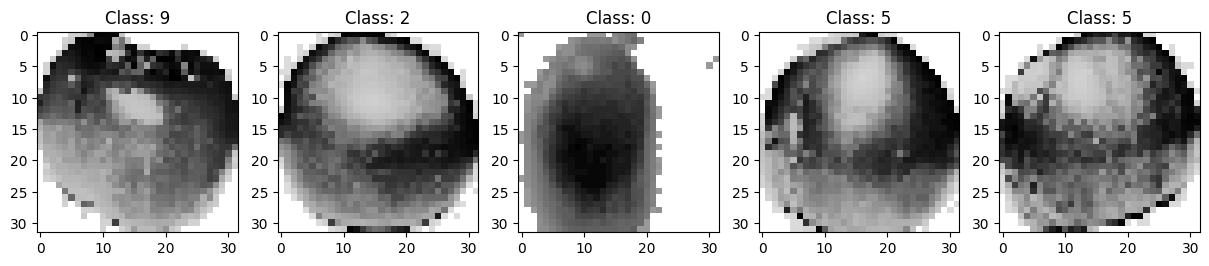

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Define the paths for training and testing data
training_path = "/content/FGrade/data/Training_set"  # Path to the training data folder
testing_path = "/content/FGrade/data/Testing_set"  # Path to the testing data folder

imageDimensions = (32, 32, 3)
testRatio = 0.2  # Test ratio
validationRatio = 0.2  # Validation ratio

# Function to load images and labels from a given path
def load_data(path):
    images = []
    class_labels = []
    classes = os.listdir(path)
    for class_label in classes:
        class_path = os.path.join(path, class_label)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (imageDimensions[0], imageDimensions[1]))  # Resize image
            images.append(image)
            class_labels.append(int(class_label))  # Use the folder name as class label
    return np.array(images), np.array(class_labels)

# Load training and testing data
X_train, y_train = load_data(training_path)
X_test, y_test = load_data(testing_path)

# Split training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# Print data shapes
print("Data Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_validation.shape, y_validation.shape)
print("Test:", X_test.shape, y_test.shape)

# Data preprocessing (grayscale conversion, equalization, normalization)
def preprocess_data(images):
    preprocessed_images = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.equalizeHist(img)  # Histogram equalization
        img = img / 255.0  # Normalization
        preprocessed_images.append(img)
    return np.array(preprocessed_images)

# Preprocess training, validation, and testing data
X_train = preprocess_data(X_train)
X_validation = preprocess_data(X_validation)
X_test = preprocess_data(X_test)

# Reshape data for CNN input
X_train = X_train.reshape(X_train.shape[0], imageDimensions[0], imageDimensions[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], imageDimensions[0], imageDimensions[1], 1)
X_test = X_test.reshape(X_test.shape[0], imageDimensions[0], imageDimensions[1], 1)

# Convert labels to one-hot encoded format
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_validation = to_categorical(y_validation, num_classes)
y_test = to_categorical(y_test, num_classes)

# Display sample images and labels
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(X_train[i].reshape(imageDimensions[0], imageDimensions[1]), cmap='gray')
    axs[i].set_title('Class: ' + str(y_train[i].argmax()))
plt.show()


Data Shapes:
Train: (4097, 32, 32, 3) (4097,)
Validation: (1025, 32, 32, 3) (1025,)
Test: (1275, 32, 32, 3) (1275,)


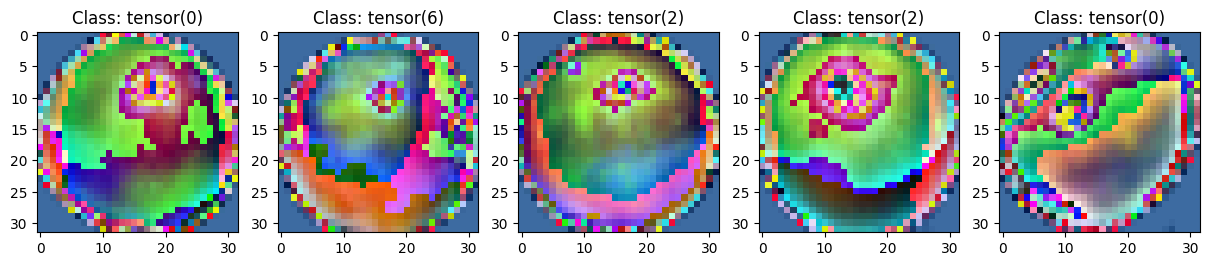

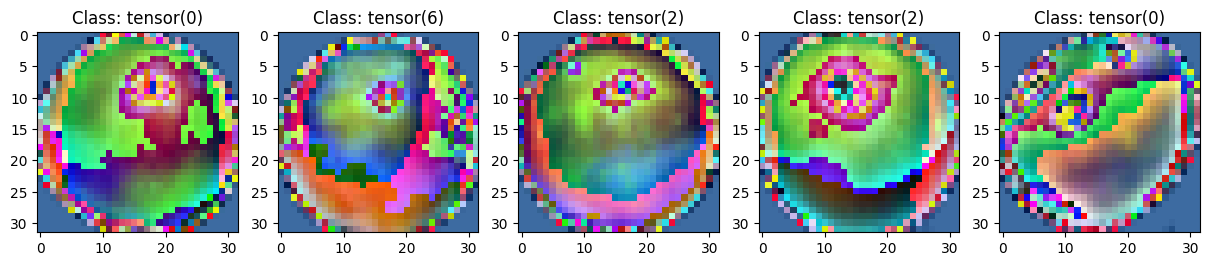

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Define the paths for training and testing data
training_path = "/content/FGrade/data/Training_set"  # Path to the training data folder
testing_path = "/content/FGrade/data/Testing_set"  # Path to the testing data folder

imageDimensions = (32, 32, 3)
testRatio = 0.2  # Test ratio
validationRatio = 0.2  # Validation ratio

# Function to load images and labels from a given path
def load_data(path):
    images = []
    class_labels = []
    classes = os.listdir(path)
    for class_label in classes:
        class_path = os.path.join(path, class_label)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (imageDimensions[0], imageDimensions[1]))  # Resize image
            images.append(image)
            class_labels.append(int(class_label))  # Use the folder name as class label
    return np.array(images), np.array(class_labels)

# Load training and testing data
X_train, y_train = load_data(training_path)
X_test, y_test = load_data(testing_path)

# Split training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# Print data shapes
print("Data Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_validation.shape, y_validation.shape)
print("Test:", X_test.shape, y_test.shape)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((imageDimensions[0], imageDimensions[1])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization values
])

# Load dataset using ImageFolder (assuming your data is structured as folders with images)
train_dataset = ImageFolder(training_path, transform=transform)
test_dataset = ImageFolder(testing_path, transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Display sample images and labels (after preprocessing)
for images, labels in train_loader:
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(TF.to_pil_image(images[i]))  # Convert tensor back to PIL image for display
        axs[i].set_title('Class: ' + str(labels[i]))
    plt.show()
    break  # Display only the first batch
